In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from numpy.linalg import cholesky
%matplotlib inline

In [2]:
def genData(M, N = 100):
    rnd.seed(0)
    Sigma = np.array([[1, 0], [0, 1]])
    R = cholesky(Sigma)
    
    mu = np.array([[-M, 0]])
    s1 = np.dot(np.random.randn(N, 2), R) + mu
    mu = np.array([[M, 0]])
    s2 = np.dot(np.random.randn(N, 2), R) + mu
    
    one = np.ones(s1.shape[0]).reshape(100,1)
    
    s1 = np.concatenate((s1, -1 * one), axis = 1)
    s2 = np.concatenate((s2,  1 * one), axis = 1)
    s_t = np.concatenate((s1, s2), axis=0)
    s = np.concatenate((np.ones((s_t.shape[0],1)), s_t), axis=1)
    
    return s

In [3]:
S = genData(2)
# print(S[:3], S[-3:])

In [77]:
def genPlt(S, w, plt):
    y = np.linspace(-3,3)
    x = (w[0] + w[2] * y)/w[1]

    plt.plot(S[:101,1],S[:101,2],'+')
    plt.plot(S[101:,1],S[101:,2],'o')
    plt.plot(x,y)
    
    return plt

In [81]:
def cal_cov_and_avg(samples):
    """
    给定一个类别的数据，计算协方差矩阵和平均向量
    :param samples: 
    :return: 
    """
    u1 = np.mean(samples, axis=0)
    cov_m = np.zeros((samples.shape[1], samples.shape[1]))
    for s in samples:
        t = s - u1
        cov_m += t * t.T
    return cov_m, u1


def fisher(c_1, c_2):
    """
    fisher算法实现(请参考上面推导出来的公式，那个才是精华部分)
    :param c_1: 
    :param c_2: 
    :return: 
    """
    cov_1, u1 = cal_cov_and_avg(c_1)
    cov_2, u2 = cal_cov_and_avg(c_2)
    s_w = cov_1 + cov_2
#     u, s, v = np.linalg.svd(s_w)  # 奇异值分解
#     s_w_inv = np.dot(np.dot(v.T, np.linalg.pinv(np.diag(s))), u.T)
    s_w_inv = np.linalg.pinv(s_w)
    return np.dot(s_w_inv, u1 - u2)

In [6]:
#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征    
def meanX(data):
    return np.mean(data, axis=0) #axis=0表示按照列来求均值，如果输入list,则axis=1

#计算类内离散度矩阵子项si
def compute_si(xi):
    n = xi.shape[0]
    ui = meanX(xi)
    si = 0
    for i in range(0, n):
        si = si + ( xi[i, :] - ui).T * (xi[i, :] - ui )   
    return si

#计算类间离散度矩阵Sb
def compute_Sb(x1, x2):
    dataX=np.vstack((x1,x2))#合并样本   
#     print("dataX:", dataX)
    #计算均值
    u1=meanX(x1)
    u2=meanX(x2)    
    u=meanX(dataX) #所有样本的均值
    Sb = (u-u1).T * (u-u1) + (u-u2).T * (u-u2)
    return Sb
    
        
def LDA(x1, x2):
    #计算类内离散度矩阵Sw
    s1 = compute_si(x1)
    s2 = compute_si(x2)     
    #Sw=(n1*s1+n2*s2)/(n1+n2)
    Sw = s1 + s2
    
    #计算类间离散度矩阵Sb
    #Sb=(n1*(m-m1).T*(m-m1)+n2*(m-m2).T*(m-m2))/(n1+n2)
    Sb = compute_Sb(x1, x2)
    
    #求最大特征值对应的特征向量    
    eig_value, vec = np.linalg.eig(np.mat(Sw).I*Sb)#特征值和特征向量
    index_vec = np.argsort(-eig_value)#对eig_value从大到小排序，返回索引
    eig_index = index_vec[:1] #取出最大的特征值的索引
    w = vec[:, eig_index] #取出最大的特征值对应的特征向量
    return w

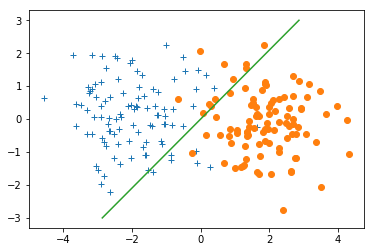

[ 0.         -0.00318603 -0.00303943]


In [82]:
cov1, u1 = cal_cov_and_avg(S[:S.shape[0]//2, 1:-1])
# print(cov1, '\n\n\n\n\n', u1)
cov2, u2 = cal_cov_and_avg(S[S.shape[0]//2:, 1:-1])
# print(cov2, '\n\n\n\n\n', u2)
w = fisher(S[:S.shape[0]//2, :-1],S[S.shape[0]//2:, :-1])
plt = genPlt(S, w, plt)
plt.show()
print(w)

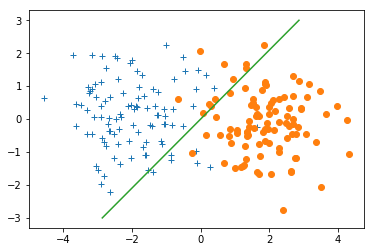

[[0.0], [-0.7235576317909402], [-0.6902639737644477]]

In [83]:
w2 = LDA(S[:S.shape[0]//2, :-1], S[S.shape[0]//2:, :-1])
plt = genPlt(S, np.squeeze(np.asarray(w2)).flatten(), plt)
# plt = genPlt(S, w2.tolist(), plt)
plt.show()
w2.tolist()